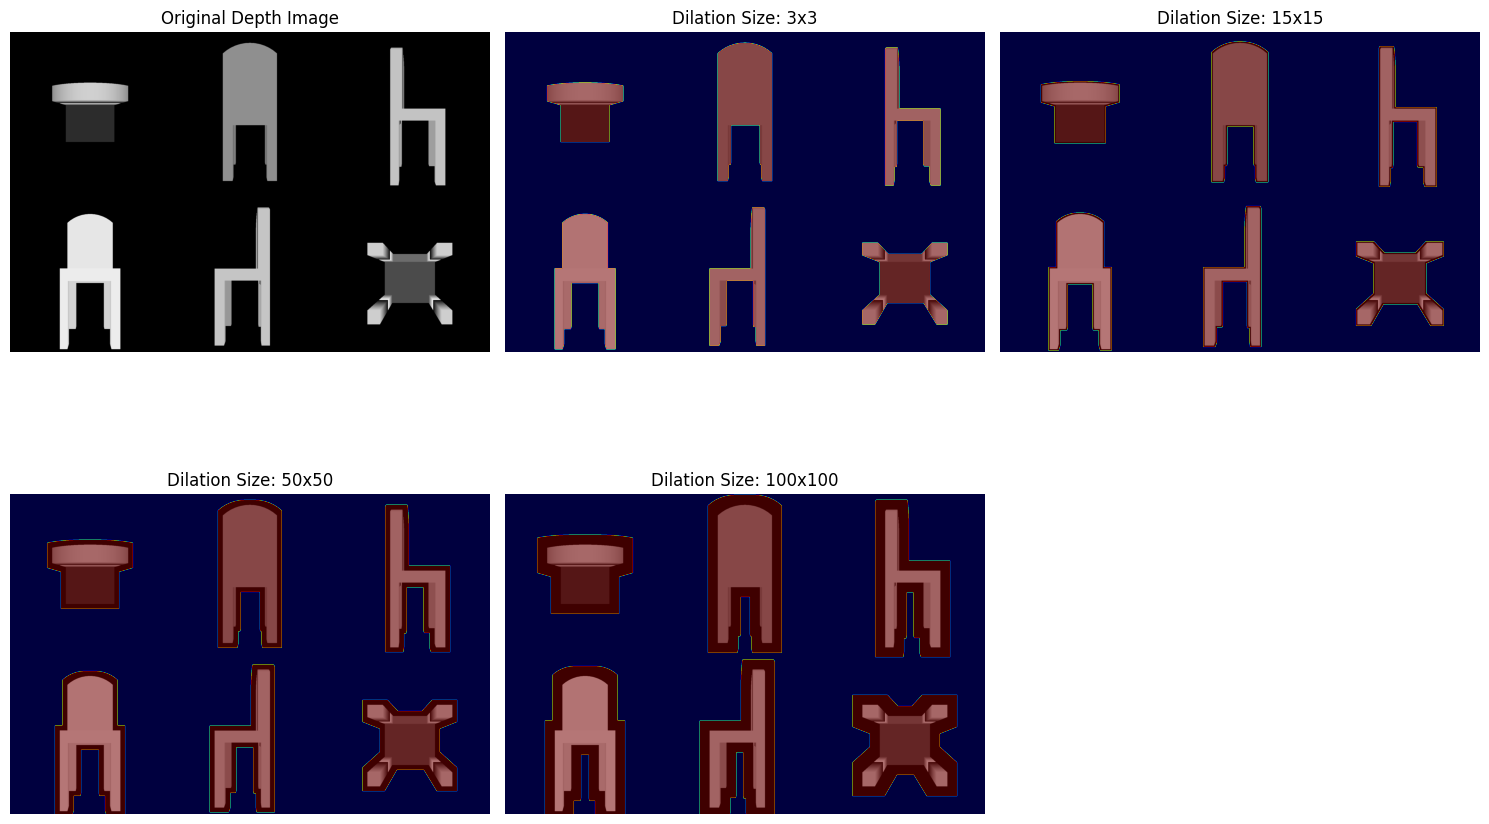

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # For reading PNG images
from scipy.ndimage import binary_dilation

# Load the saved PNG image as a grayscale image
image_path = "/Users/cmazzoleni/Documents/GitHub/SemesterProjectETH/data/dataset/dataset_v2_1508/cubemap_mesh_depth/1ac6531a337de85f2f7628d6bf38bcc4_cubemap.png"
depth_image = np.array(Image.open(image_path).convert('L'))  # Convert image to grayscale and load as a NumPy array

# Generate mask: For example, mask where depth values are not 0 or 1 (binary mask)
mask = (depth_image != 0) & (depth_image != 1)

# Dilation values to test (vary the structure size)
dilation_sizes = [3, 15, 50, 100]

# Create a plot to visualize the effect of different dilation sizes
plt.figure(figsize=(15, 10))

# Original depth image
plt.subplot(2, 3, 1)
plt.imshow(depth_image, cmap='gray')
plt.title('Original Depth Image')
plt.axis('off')

for i, size in enumerate(dilation_sizes, 2):
    dilated_mask = binary_dilation(mask, structure=np.ones((size, size)))

    plt.subplot(2, 3, i)
    plt.imshow(depth_image, cmap='gray')  
    plt.imshow(dilated_mask, cmap='jet', alpha=0.5)  
    plt.title(f'Dilation Size: {size}x{size}')
    plt.axis('off')

plt.tight_layout()
plt.show()

